# Data Exploration of ACLED

# Questions: 
## 1) Do violent events worsen around Fridays in Gaza?
## 2) What phrases/ words occur most?
## 3) What are the kind of events and subevent occuring the most globally versus Palestine?



PLAN: 
1) Load ACLED dataset
March to May file: icloud '2024-03-01-2024-05-01-Middle_East.csv'

2) Preprocess data
acled_data['event_date'] = pd.to_datetime(acled_data['event_date'])

3) Aggregate data by daily time intervals
daily_events = acled_data.groupby(pd.Grouper(key='event_date', freq='D')).size().reset_index(name='count')

4) Handle missing data (if any)
daily_events = daily_events.fillna(0)

5) Visualize the time series
import matplotlib.pyplot as plt
plt.plot(daily_events['event_date'], daily_events['count'])
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('ACLED Time Series')
plt.show()

In [3]:
#Import libraries
import pandas as pd
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim 
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

import folium

In [4]:
from PIL import Image
from nltk.corpus import stopwords

In [14]:
!pip install  fsspec==0.7.4 


In [5]:
#Pull in ACLED file 
#elections = pd.read_excel(r'C:/Users⁩/mehrunisaqayyum⁩/Downloads⁩⁩/idea_export_40_63b33c98b0797 2.xlsx') #'C:/Users/mehrunisaqayyum/Downloads/idea_export_40_63b33c98b0797.xls')
acled_file = pd.read_csv("/Users/mehrunisaqayyum/Downloads/ACLED_MENA_2024-01-01-2024-02-20.csv") # https://drive.google.com/file/d/12HnAtKj_IutDbJxaQ_KQmeStReMevOZK/view') # ACLED_MENA_2024-01-01-2024-02-20.csv'
acled_file

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_best
0,ISR39145,16 February 2024,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hamas Movement,NaN,3,...,31.6893,34.5091,2,Haaretz; N12; Srugim; Times of Israel,National,"On 16 February 2024, Hamas militants in Gaza f...",0,NaN,1708379938,NaN
1,TUR34053,16 February 2024,2024,2,Strategic developments,Strategic developments,Arrests,Military Forces of Turkey (2016-),NaN,1,...,39.4421,26.3447,2,Anadolu Agency,National,"Around 16 February 2024 (as reported), 77 migr...",0,NaN,1708379939,NaN
2,TUR34053,16 February 2024,2024,2,Strategic developments,Strategic developments,Arrests,Civilians (International),Refugees/IDPs (International),7,...,39.4421,26.3447,2,Anadolu Agency,National,"Around 16 February 2024 (as reported), 77 migr...",0,NaN,1708379939,NaN
3,YEM85372,16 February 2024,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of the United States (2021-),NaN,8,...,14.2833,43.0667,1,Al Masirah; Yemen Data Project; Yemen News Age...,Local partner-National,"Interception: On 16 February 2024, US forces c...",0,NaN,1708379941,NaN
4,YEM85372,16 February 2024,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Yemen (2017-) Houthi,NaN,1,...,14.2833,43.0667,1,Al Masirah; Yemen Data Project; Yemen News Age...,Local partner-National,"Interception: On 16 February 2024, US forces c...",0,NaN,1708379941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56805,PER9181,01 January 2024,2024,1,Political violence,Riots,Mob violence,Civilians (Brazil),NaN,7,...,-3.7750,-73.2893,1,Diario Correo (Peru),National,"On 1 January 2024, in San Juan (Loreto), resid...",1,crowd size=no report,1708383909,12169.0
56806,SSD9741,01 January 2024,2024,1,Political violence,Violence against civilians,Attack,Unidentified Communal Militia (South Sudan),Pastoralists (South Sudan),4,...,7.4629,30.2743,2,The City Review (South Sudan),National,"On 1 January 2024, armed youths from Lake stat...",0,NaN,1708383923,1133.0
56807,SSD9741,01 January 2024,2024,1,Political violence,Violence against civilians,Attack,Civilians (South Sudan),Pastoralists (South Sudan),7,...,7.4629,30.2743,2,The City Review (South Sudan),National,"On 1 January 2024, armed youths from Lake stat...",0,NaN,1708383923,1133.0
56808,SYR121921,01 January 2024,2024,1,Political violence,Violence against civilians,Abduction/forced disappearance,Militia (Pro-Iran),NaN,3,...,36.1696,37.2256,1,SOHR,Other,"On 1 January 2024, a Pro-Iran militia detained...",0,NaN,1708383925,49164.0


# Pre-Process

In [7]:
#2) Convert to datetime for data analysis
acled_file['event_date'] = pd.to_datetime(acled_file['event_date'])
acled_file['event_date'] 

0       2024-02-16
1       2024-02-16
2       2024-02-16
3       2024-02-16
4       2024-02-16
           ...    
56805   2024-01-01
56806   2024-01-01
56807   2024-01-01
56808   2024-01-01
56809   2024-01-01
Name: event_date, Length: 56810, dtype: datetime64[ns]

In [8]:
#3) Aggregate data by daily time intervals 
daily_events = acled_file.groupby(pd.Grouper(key='event_date', freq='D')).size().reset_index(name='count')
daily_events

,event_date,count
0,2024-01-01,1097
1,2024-01-02,1167
2,2024-01-03,1232
3,2024-01-04,1241
4,2024-01-05,1288
5,2024-01-06,1376
6,2024-01-07,1248
7,2024-01-08,1441
8,2024-01-09,1354
9,2024-01-10,1315


In [9]:
#Day of Week
## Friday is 4
acled_file['day_of_week'] = acled_file['event_date'].dt.dayofweek
acled_file

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,population_best,day_of_week
0,ISR39145,2024-02-16,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hamas Movement,NaN,3,...,34.5091,2,Haaretz; N12; Srugim; Times of Israel,National,"On 16 February 2024, Hamas militants in Gaza f...",0,NaN,1708379938,NaN,4
1,TUR34053,2024-02-16,2024,2,Strategic developments,Strategic developments,Arrests,Military Forces of Turkey (2016-),NaN,1,...,26.3447,2,Anadolu Agency,National,"Around 16 February 2024 (as reported), 77 migr...",0,NaN,1708379939,NaN,4
2,TUR34053,2024-02-16,2024,2,Strategic developments,Strategic developments,Arrests,Civilians (International),Refugees/IDPs (International),7,...,26.3447,2,Anadolu Agency,National,"Around 16 February 2024 (as reported), 77 migr...",0,NaN,1708379939,NaN,4
3,YEM85372,2024-02-16,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of the United States (2021-),NaN,8,...,43.0667,1,Al Masirah; Yemen Data Project; Yemen News Age...,Local partner-National,"Interception: On 16 February 2024, US forces c...",0,NaN,1708379941,NaN,4
4,YEM85372,2024-02-16,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Yemen (2017-) Houthi,NaN,1,...,43.0667,1,Al Masirah; Yemen Data Project; Yemen News Age...,Local partner-National,"Interception: On 16 February 2024, US forces c...",0,NaN,1708379941,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56805,PER9181,2024-01-01,2024,1,Political violence,Riots,Mob violence,Civilians (Brazil),NaN,7,...,-73.2893,1,Diario Correo (Peru),National,"On 1 January 2024, in San Juan (Loreto), resid...",1,crowd size=no report,1708383909,12169.0,0
56806,SSD9741,2024-01-01,2024,1,Political violence,Violence against civilians,Attack,Unidentified Communal Militia (South Sudan),Pastoralists (South Sudan),4,...,30.2743,2,The City Review (South Sudan),National,"On 1 January 2024, armed youths from Lake stat...",0,NaN,1708383923,1133.0,0
56807,SSD9741,2024-01-01,2024,1,Political violence,Violence against civilians,Attack,Civilians (South Sudan),Pastoralists (South Sudan),7,...,30.2743,2,The City Review (South Sudan),National,"On 1 January 2024, armed youths from Lake stat...",0,NaN,1708383923,1133.0,0
56808,SYR121921,2024-01-01,2024,1,Political violence,Violence against civilians,Abduction/forced disappearance,Militia (Pro-Iran),NaN,3,...,37.2256,1,SOHR,Other,"On 1 January 2024, a Pro-Iran militia detained...",0,NaN,1708383925,49164.0,0


In [13]:
#Groupby counts of  'day_of_week'
acled_file['day_of_week'].value_counts()

0    8938
2    8759
1    8540
3    8462
4    8324
5    7202
6    6585
Name: day_of_week, dtype: int64

### Observation: most attacks occur on a Sunday, followed by Tuesday, then Monday. Saturdays see the least violence. Fridays are on lower end. Check if IoF by grouping by threat actor.

## Descriptives 

In [48]:
#what do the values look like?
acled_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56810 entries, 0 to 56809
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       56810 non-null  object 
 1   event_date          56810 non-null  object 
 2   year                56810 non-null  int64  
 3   time_precision      56810 non-null  int64  
 4   disorder_type       56810 non-null  object 
 5   event_type          56810 non-null  object 
 6   sub_event_type      56810 non-null  object 
 7   actor1              56810 non-null  object 
 8   assoc_actor_1       20059 non-null  object 
 9   inter1              56810 non-null  int64  
 10  interaction         56810 non-null  int64  
 11  civilian_targeting  10636 non-null  object 
 12  iso                 56810 non-null  int64  
 13  region              56810 non-null  object 
 14  country             56810 non-null  object 
 15  admin1              56711 non-null  object 
 16  admi

In [14]:
#population_best breaks down as what?
acled_file.population_best.value_counts()

33289.0    164
27502.0    162
16485.0    152
66997.0    145
45465.0    144
          ... 
4852.0       1
30320.0      1
13638.0      1
9165.0       1
2090.0       1
Name: population_best, Length: 10856, dtype: int64

In [15]:
#Mean/mode
acled_file.describe()   #Max Number of fatalities in given event is 160 

,year,time_precision,inter1,interaction,iso,latitude,longitude,geo_precision,fatalities,timestamp,population_best,day_of_week
count,56810.0,56810.000000,56810.000000,56810.000000,56810.000000,56810.000000,56810.000000,56810.000000,56810.000000,5.681000e+04,5.091800e+04,56810.000000
mean,2024.0,1.062049,5.032582,43.353741,474.295300,26.648596,22.989183,1.328463,0.760482,1.706718e+09,3.389074e+04,2.820982
std,0.0,0.247940,2.458337,23.084400,255.582733,19.096921,52.305609,0.509808,3.771632,1.087514e+06,8.397629e+04,1.958652
min,2024.0,1.000000,1.000000,10.000000,0.000000,-51.626800,-171.755300,1.000000,0.000000,1.704756e+09,0.000000e+00,0.000000
25%,2024.0,1.000000,3.000000,18.000000,275.000000,15.330500,7.357800,1.000000,0.000000,1.705978e+09,2.232000e+03,1.000000
50%,2024.0,1.000000,6.000000,38.000000,422.000000,31.442650,35.112500,1.000000,0.000000,1.706650e+09,9.187000e+03,3.000000
75%,2024.0,1.000000,7.000000,60.000000,760.000000,40.181100,43.487700,2.000000,0.000000,1.707826e+09,2.917100e+04,4.000000
max,2024.0,3.000000,8.000000,88.000000,894.000000,70.200700,179.199700,3.000000,160.000000,1.708384e+09,1.962716e+06,6.000000


In [16]:
#Type of event across areas
acled_file['event_type'].value_counts()

Protests                      17609
Explosions/Remote violence    13847
Battles                        9896
Violence against civilians     6674
Strategic developments         5519
Riots                          3265
Name: event_type, dtype: int64

In [114]:
#Kind of tags used | emphasis on 'crowd size'
acled_file['tags'].value_counts()

crowd size=no report              14440
crowd size=hundreds                 567
crowd size=large                    530
crowd size=dozens                   390
local administrators                318
                                  ...  
crowd size=estimated 5,000            1
crowd size=800-900                    1
crowd size=around 600 vehicles        1
crowd size=12 tractors                1
crowd size=1000-2000                  1
Name: tags, Length: 1168, dtype: int64

In [58]:
#Type of event across areas
acled_file['source'].value_counts()

Ministry of Defence of Ukraine                 2260
SOHR                                            947
Suspilne Media                                  946
Ministry of Defence of Russia                   918
People's Defense Forces                         824
                                               ... 
Sudans Post; Twic Media Reports                   1
Extinction Rebellion; Maaseudun Tulevaisuus       1
Hespress; Kech24; Morocco World News              1
Pisa Today; Voce Di Mantova                       1
Karar; Mezopotamya Agency                         1
Name: source, Length: 6372, dtype: int64

In [59]:
#Type of event across areas
acled_file['source_scale'].value_counts()

National                       27599
Subnational                     6859
Other                           6817
New media-National              2514
New media                       2058
Other-National                  1835
Subnational-National            1725
Local partner-Other             1598
Local partner-New media          887
Other-New media                  861
Local partner-National           805
Regional                         622
International                    600
National-Regional                579
National-International           494
Other-Regional                   204
Local partner-International      191
Other-International              150
Other-Subnational                143
New media-Subnational            117
Subnational-Regional              84
Regional-International            27
New media-International           19
Subnational-International         13
New media-Regional                 9
Name: source_scale, dtype: int64

In [65]:
#Civilian Targeting values 
acled_file['civilian_targeting'].value_counts()

Civilian targeting    10636
Name: civilian_targeting, dtype: int64

In [61]:
#REgion across areas
acled_file['region'].value_counts()

Middle East                  14929
Europe                       13589
South Asia                    5363
South America                 4167
North America                 3781
Southeast Asia                3060
Western Africa                2656
Northern Africa               2466
Eastern Africa                2461
Middle Africa                 1226
East Asia                      884
Caribbean                      810
Caucasus and Central Asia      462
Central America                377
Southern Africa                361
Oceania                        218
Name: region, dtype: int64

In [66]:
#Text column of 'notes' for our NLP prompt project
acled_file['notes'].value_counts()

Property destruction: Around 29 January 2024 (as reported), Turkish Gendarmerie forces discovered and destroyed a total of 28 PKK shelters together with the supplies they found inside, during security operations carried out in rural areas of Mardin, Bitlis, Sirnak, Batman, Siirt, Tunceli and Diyarbakir provinces, within the scope of air-backed KAHRAMANLAR-47 operation. One event for each location (total 7 events) coded.                                                                                                                                                                                             14
Interception: On 17 January 2024, at around 11:59 pm Sanaa time, US Navy forces launched missile strikes from surface ships and submarine to intercept 14 Houthi missiles in six locations: the technical institute in As Sawmaah district (Al Bayda), Haruniyah Junction east of As Salif (coded to Jabal Qumah) (Al Munirah, Al Hudaydah), the military police camp in Dhamar al Qarn (Anss, Dh

## Groupings

In [53]:
#Group by Disorder Type
acled_file.groupby('disorder_type')['event_type'].value_counts()

disorder_type                       event_type                
Demonstrations                      Protests                      17577
                                    Riots                           901
Political violence                  Explosions/Remote violence    13847
                                    Battles                        9896
                                    Violence against civilians     6674
                                    Riots                          2364
Political violence; Demonstrations  Protests                         32
Strategic developments              Strategic developments         5519
Name: event_type, dtype: int64

In [54]:
#sub_event_type	looks like grouped by 'disorder_type'
acled_file.groupby('disorder_type')['sub_event_type'].value_counts() 

disorder_type                       sub_event_type                     
Demonstrations                      Peaceful protest                       16667
                                    Protest with intervention                910
                                    Violent demonstration                    901
Political violence                  Armed clash                             9788
                                    Shelling/artillery/missile attack       7017
                                    Attack                                  5752
                                    Air/drone strike                        5542
                                    Mob violence                            2364
                                    Remote explosive/landmine/IED           1063
                                    Abduction/forced disappearance           850
                                    Grenade                                  217
                                    S

In [80]:
#Twitter came up as a source 
source_most_cited = acled_file.groupby("country")['source'].value_counts()
source_most_cited  #How many times was Twitter a primary source?

country      source                                    
Afghanistan  Hasht-e Subh                                  39
             Afghan Ministry of Interior Affairs           18
             Etilaat e Roz; Hasht-e Subh; Twitter          16
             Hasht-e Subh; Twitter                         15
             Etilaat e Roz                                 14
                                                           ..
Zimbabwe     Bulawayo24; Newsday (Zimbabwe)                 1
eSwatini     Times of Swaziland                             4
             Swaziland News                                 3
             Swaziland Media Commentary; Swaziland News     2
             Swazi Observer; Swaziland Media Commentary     1
Name: source, Length: 6540, dtype: int64

### How many times was Twitter a primary source?

In [84]:
#How many times was Twitter a primary source?
substr = 'Twitter'
print (acled_file.source.str.count(substr).sum())

3317


In [92]:
#Call apply on the 'scores' column on the groupby object and use the vectorise str method contains, use this to filter the group and call count: In : 
#df.groupby(['catA', 'catB'])['scores'].apply(lambda x: x[x.str.contains('RET')].count())

countries_Twitter_source = acled_file.groupby(['country', 'disorder_type'])['source'].apply(lambda x: x[x.str.contains("Twitter")].count())
countries_Twitter_source 

country      disorder_type                     
Afghanistan  Demonstrations                         3
             Political violence                    80
             Strategic developments                 0
Albania      Demonstrations                         0
Algeria      Demonstrations                         0
                                                   ..
Zimbabwe     Political violence; Demonstrations     0
             Strategic developments                 0
eSwatini     Demonstrations                         0
             Political violence                     0
             Strategic developments                 0
Name: source, Length: 382, dtype: int64

In [71]:
# Understand the sub-area  of interest df[["country", "description","points"]].head()
acled_file[['country','actor1','source', 'source_scale','event_type']].head().sort_values(by='country')

,country,actor1,source,source_scale,event_type
0,Israel,Hamas Movement,Haaretz; N12; Srugim; Times of Israel,National,Explosions/Remote violence
1,Turkey,Military Forces of Turkey (2016-),Anadolu Agency,National,Strategic developments
2,Turkey,Civilians (International),Anadolu Agency,National,Strategic developments
3,Yemen,Military Forces of the United States (2021-),Al Masirah; Yemen Data Project; Yemen News Age...,Local partner-National,Strategic developments
4,Yemen,Military Forces of Yemen (2017-) Houthi,Al Masirah; Yemen Data Project; Yemen News Age...,Local partner-National,Strategic developments


In [74]:
# Understand the subarea  of interest df[["country", "description","points"]].head()
acled_file[['country','actor1','source', 'event_type']].head().value_counts()

country  actor1                                        source                                                             event_type                
Yemen    Military Forces of the United States (2021-)  Al Masirah; Yemen Data Project; Yemen News Agency (SABA) - Houthi  Strategic developments        1
         Military Forces of Yemen (2017-) Houthi       Al Masirah; Yemen Data Project; Yemen News Agency (SABA) - Houthi  Strategic developments        1
Turkey   Military Forces of Turkey (2016-)             Anadolu Agency                                                     Strategic developments        1
         Civilians (International)                     Anadolu Agency                                                     Strategic developments        1
Israel   Hamas Movement                                Haaretz; N12; Srugim; Times of Israel                              Explosions/Remote violence    1
dtype: int64

## I don't understand the distinction between 'disorder type' and 'sub_event_type'. 
Is political violence when the state is involved? 

In [97]:
#Plot country and Number of Events
funny = acled_file['country']

plt.figure(figsize=(15,10))
funny.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Reported Event")
plt.ylabel("Number of Events")
plt.show()

TypeError: 'int' object is not callable

<Figure size 1080x720 with 0 Axes>

## Global Aggregate Level

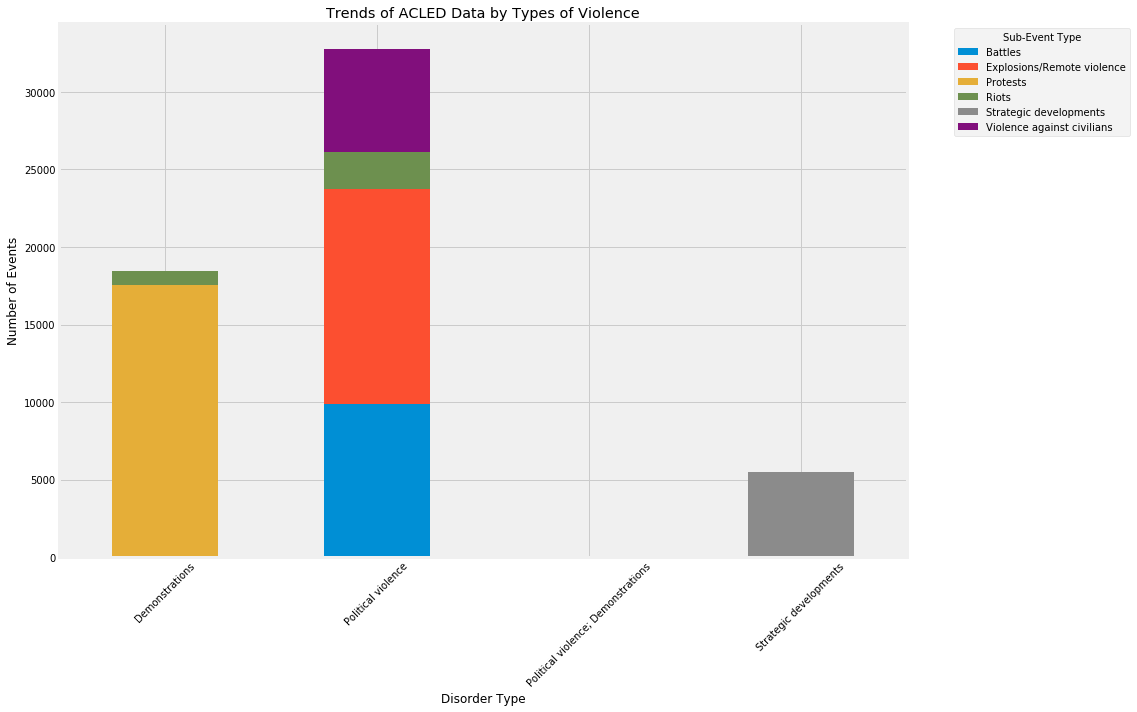

In [18]:
# Group the data by disorder type and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a stacked bar chart
violence_trends.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Trends of ACLED Data by Types of Violence')
plt.xlabel('Disorder Type')
plt.ylabel('Number of Events')
plt.legend(title='Sub-Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Region & Country Level

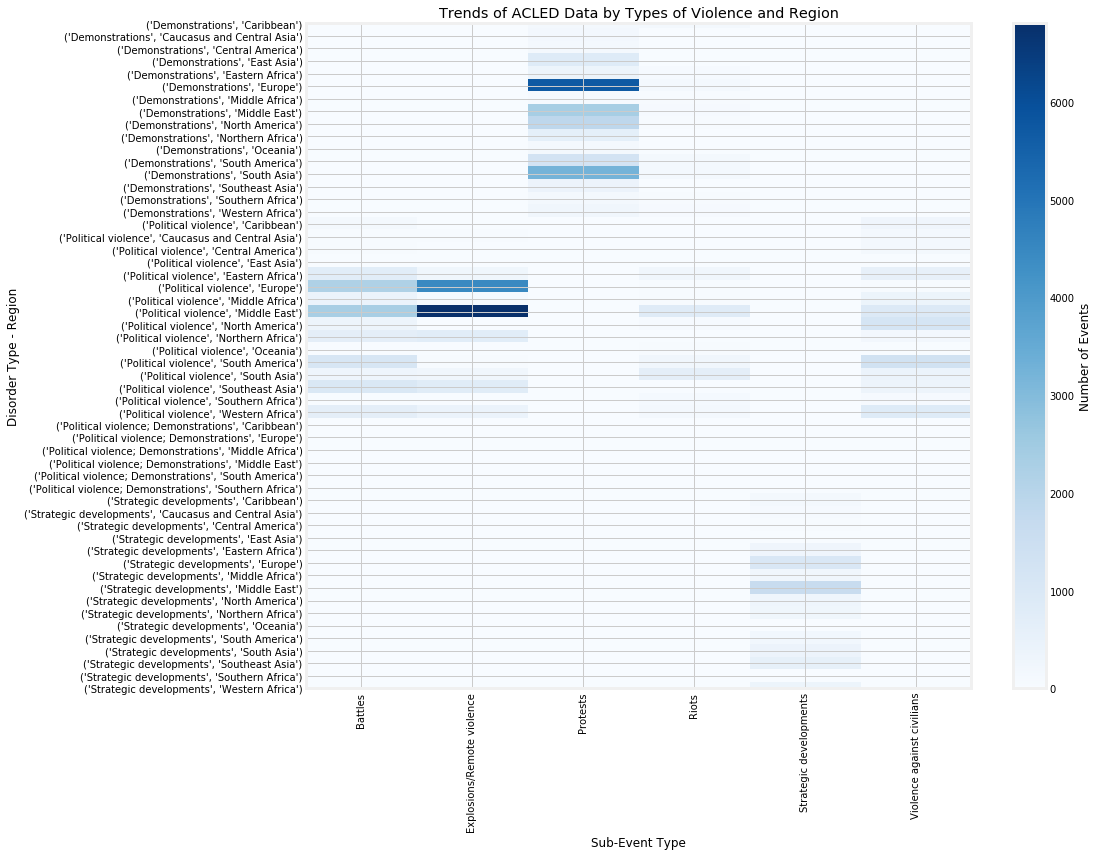

In [19]:
# Group the data by disorder type, region, and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'region', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(16, 12))
plt.imshow(violence_trends, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence and Region')
plt.xlabel('Sub-Event Type')
plt.ylabel('Disorder Type - Region')
plt.xticks(range(len(violence_trends.columns)), violence_trends.columns, rotation=90)
plt.yticks(range(len(violence_trends.index)), violence_trends.index)
plt.tight_layout()
plt.show()


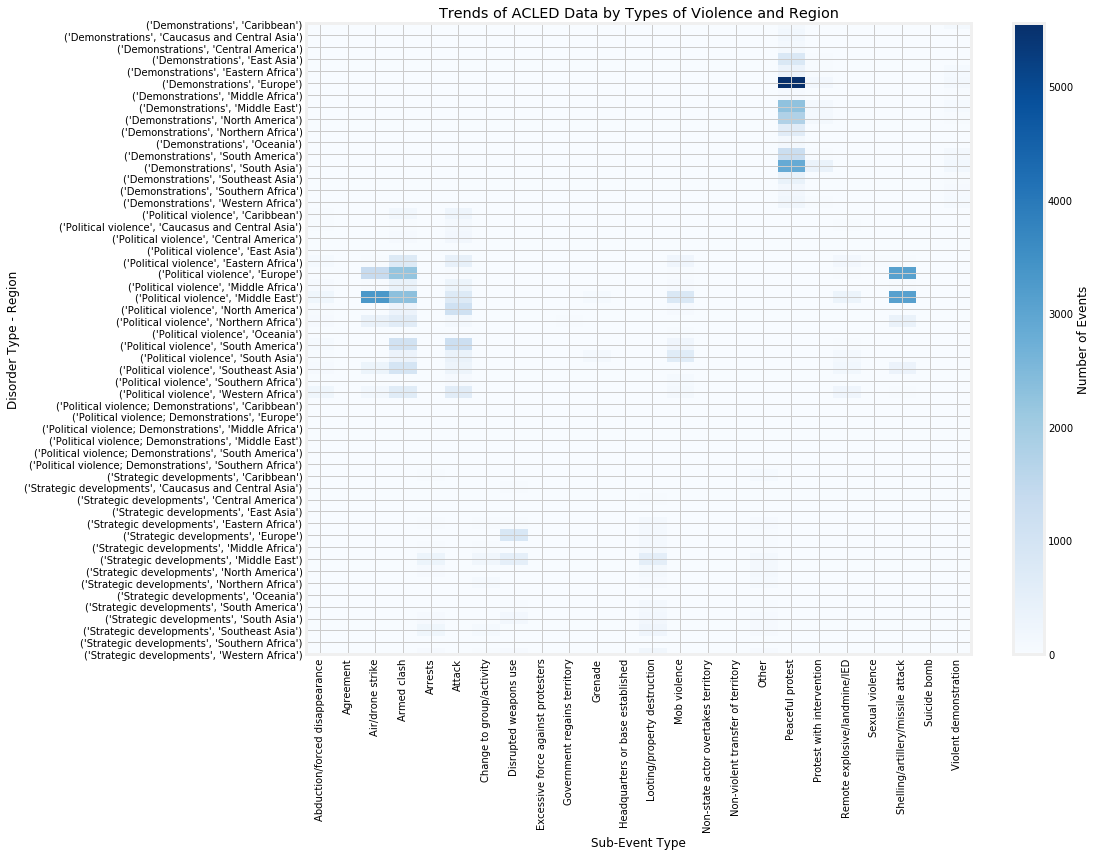

In [20]:
# Group the data by disorder type, region, and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'region', 'sub_event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(16, 12))
plt.imshow(violence_trends, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence and Region')
plt.xlabel('Sub-Event Type')
plt.ylabel('Disorder Type - Region')
plt.xticks(range(len(violence_trends.columns)), violence_trends.columns, rotation=90)
plt.yticks(range(len(violence_trends.index)), violence_trends.index)
plt.tight_layout()
plt.show()

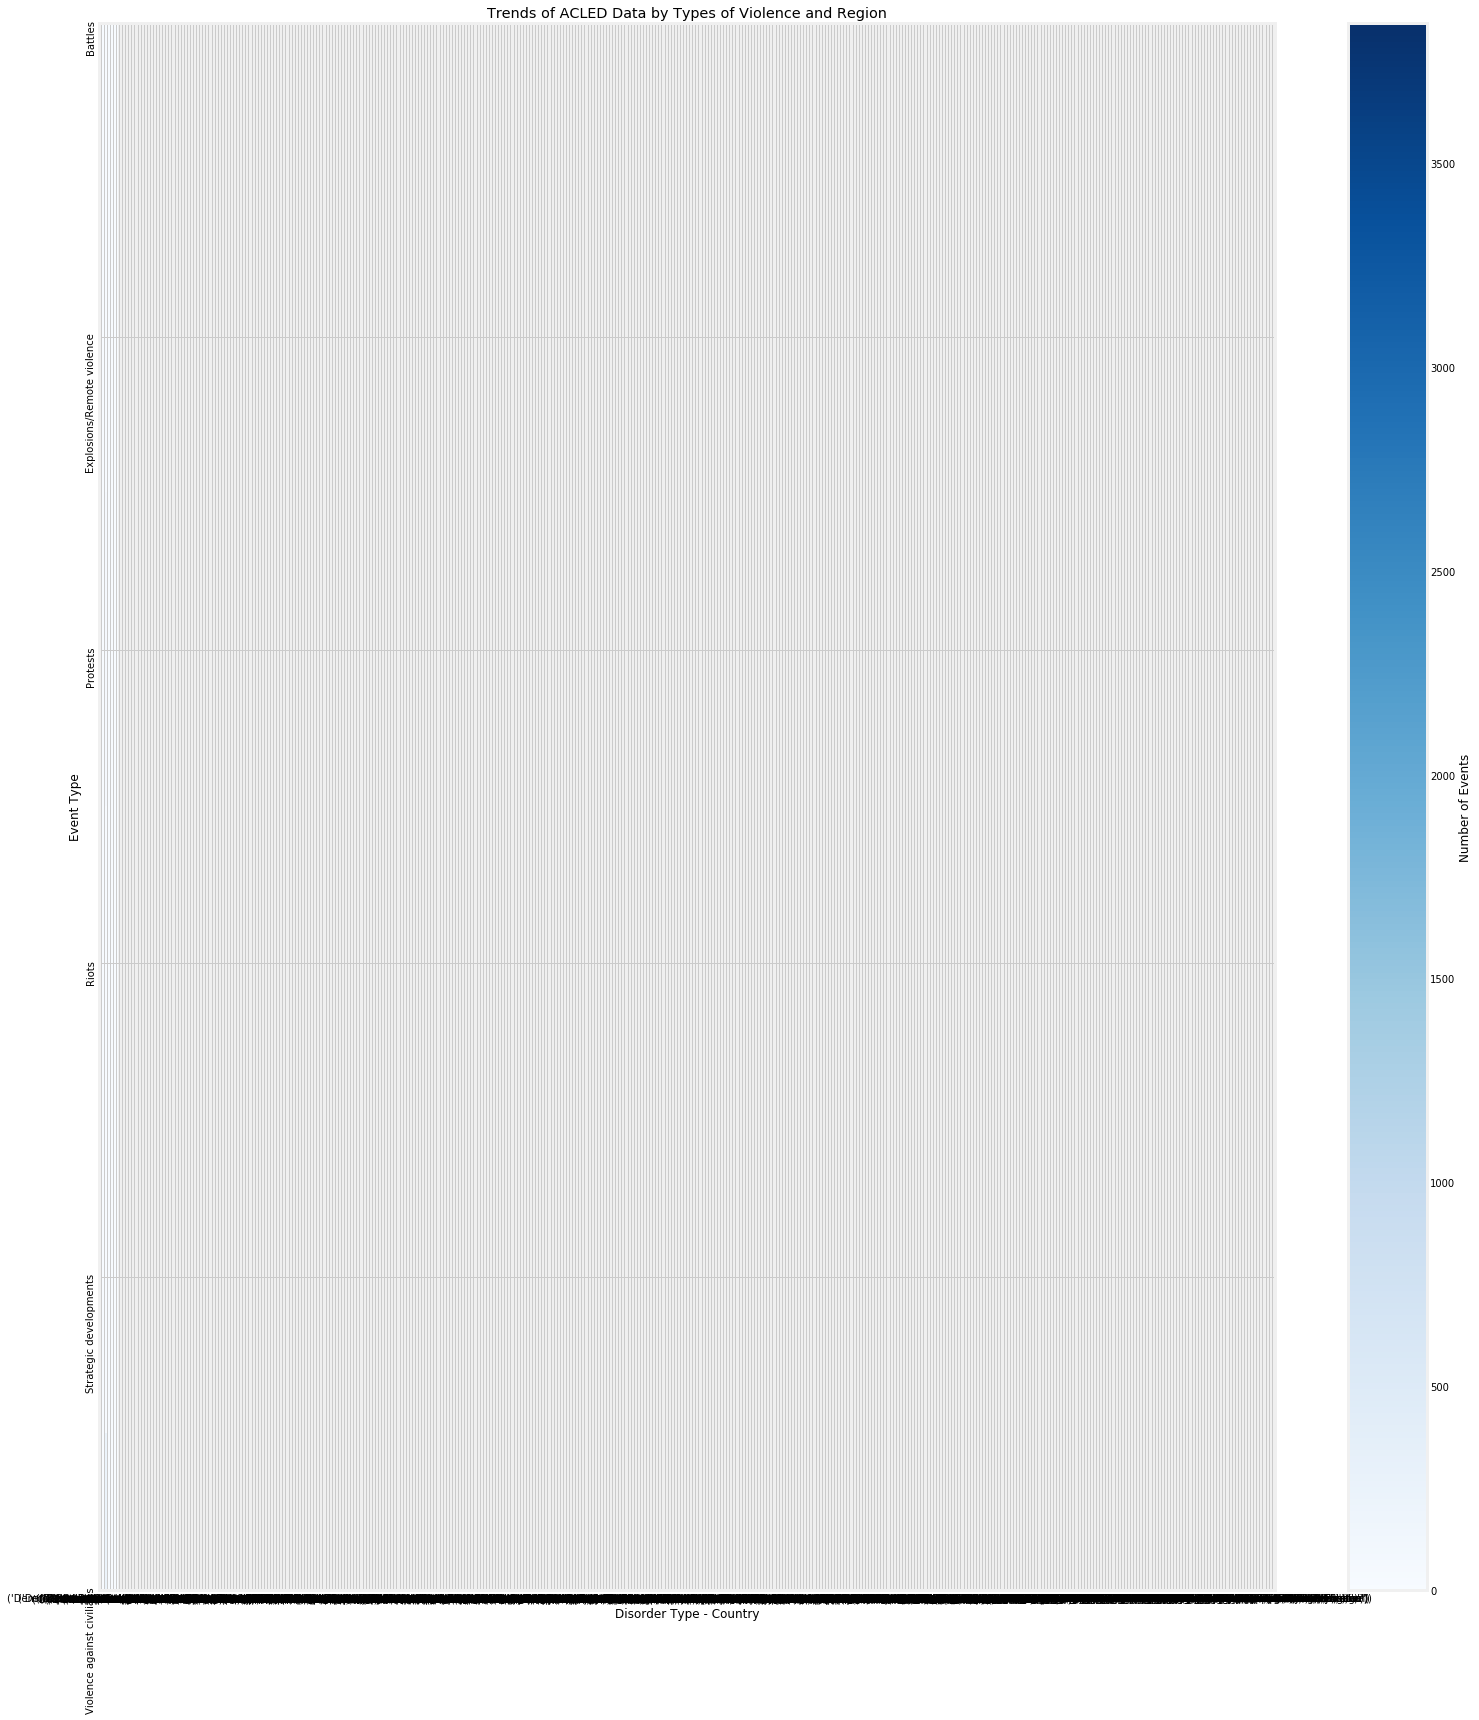

In [30]:
# Group the data by disorder type, region, and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'country', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(22, 24))
plt.imshow(violence_trends, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence and Region')
plt.xlabel('Disorder Type - Country')
plt.ylabel('Event Type')
plt.yticks(range(len(violence_trends.columns)), violence_trends.columns, rotation=90)
plt.xticks(range(len(violence_trends.index)), violence_trends.index)
plt.tight_layout()
plt.show()


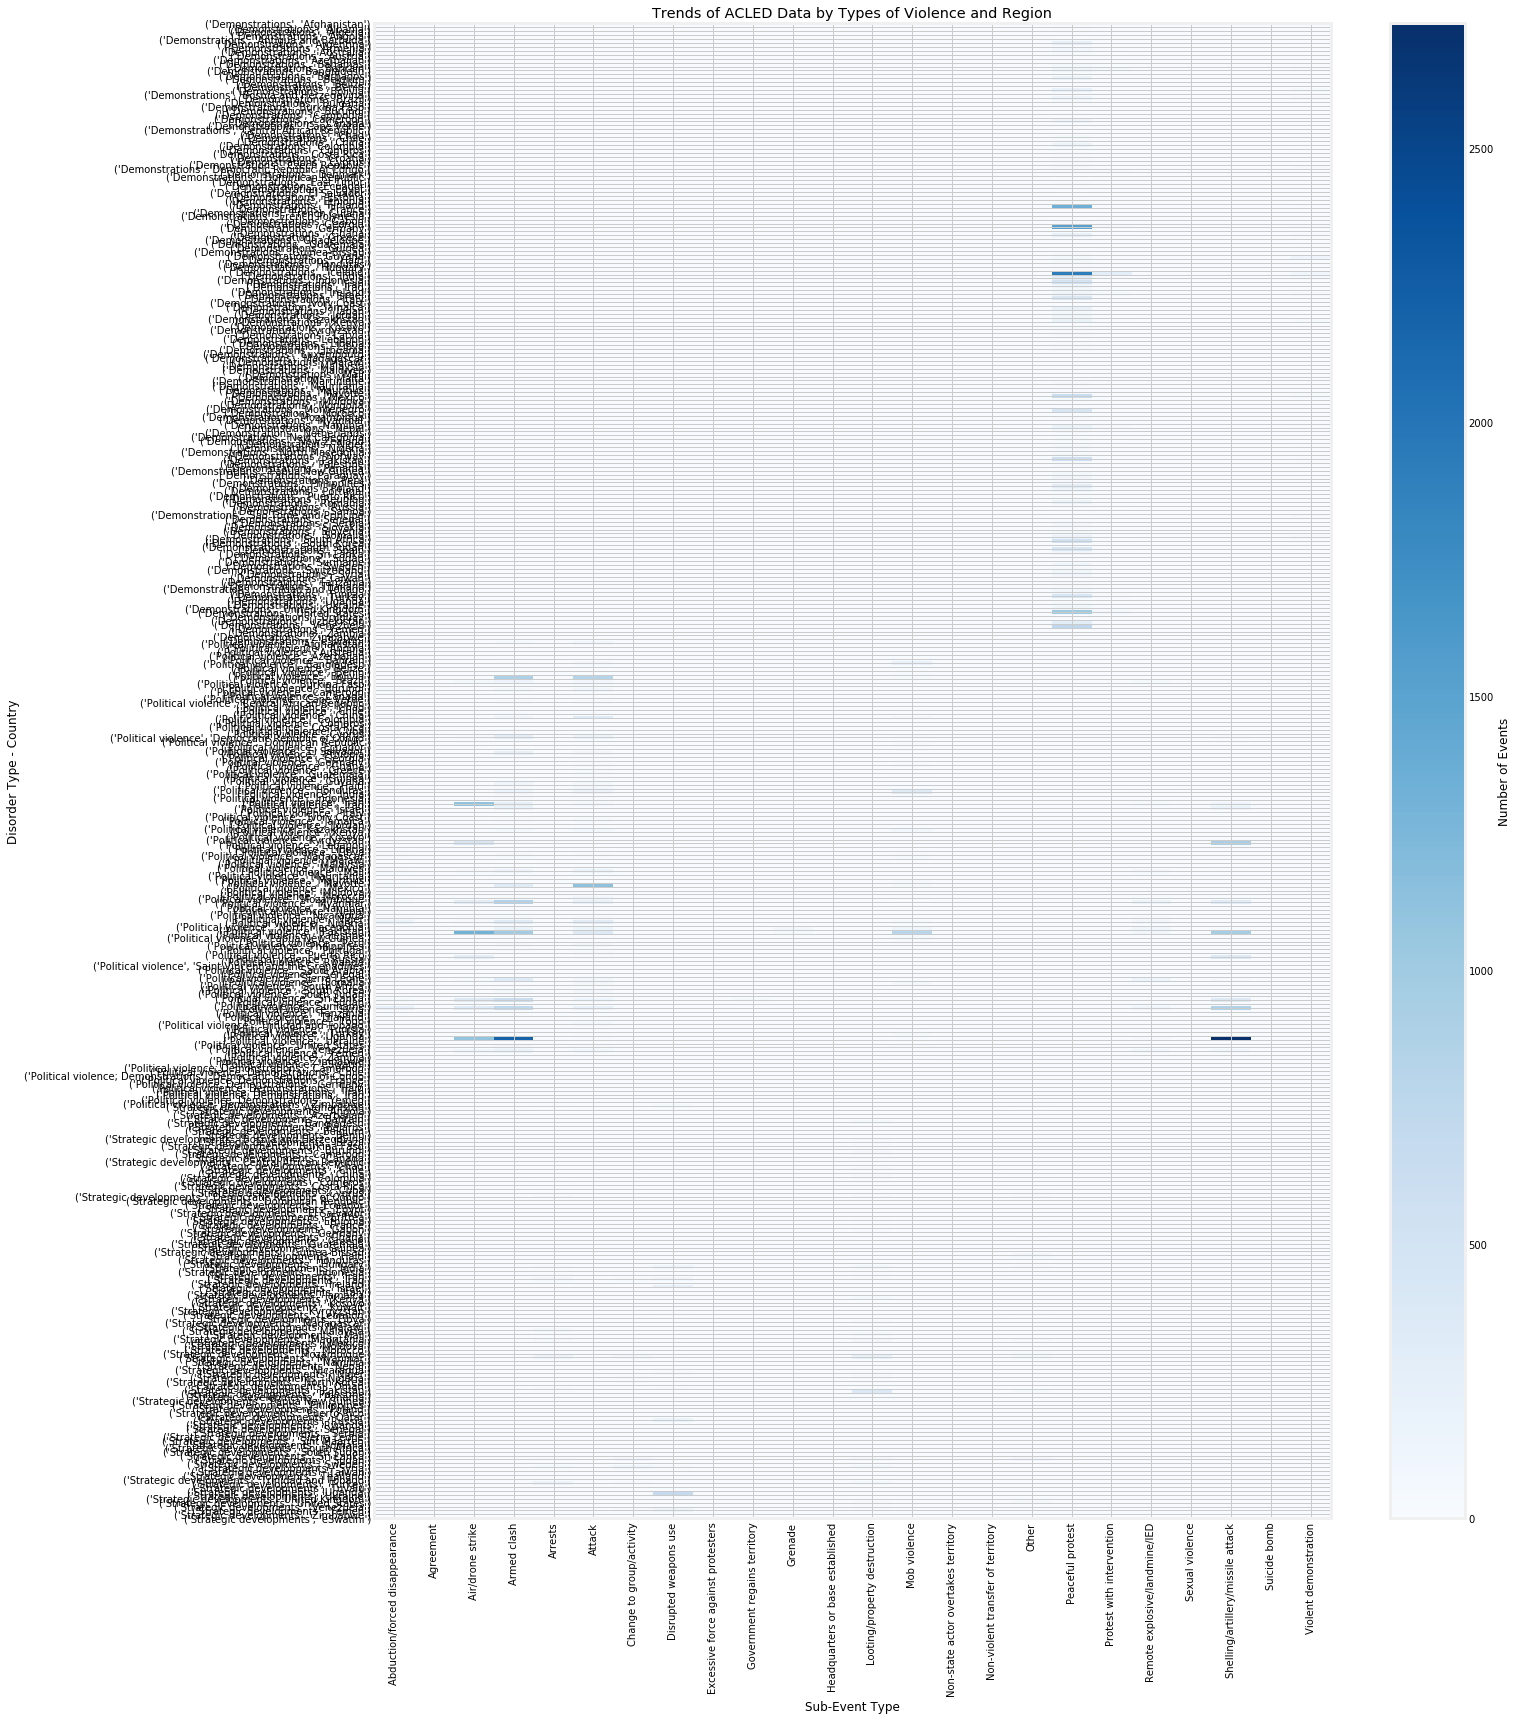

In [29]:
# Group the data by disorder type, region, and sub-event type and count occurrences
violence_trends = acled_file.groupby(['disorder_type', 'country', 'sub_event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(22, 24))
plt.imshow(violence_trends, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence and Region')
plt.xlabel('Sub-Event Type')
plt.ylabel('Disorder Type - Country')
plt.xticks(range(len(violence_trends.columns)), violence_trends.columns, rotation=90)
plt.yticks(range(len(violence_trends.index)), violence_trends.index)
plt.tight_layout()
plt.show()


## Heatmap

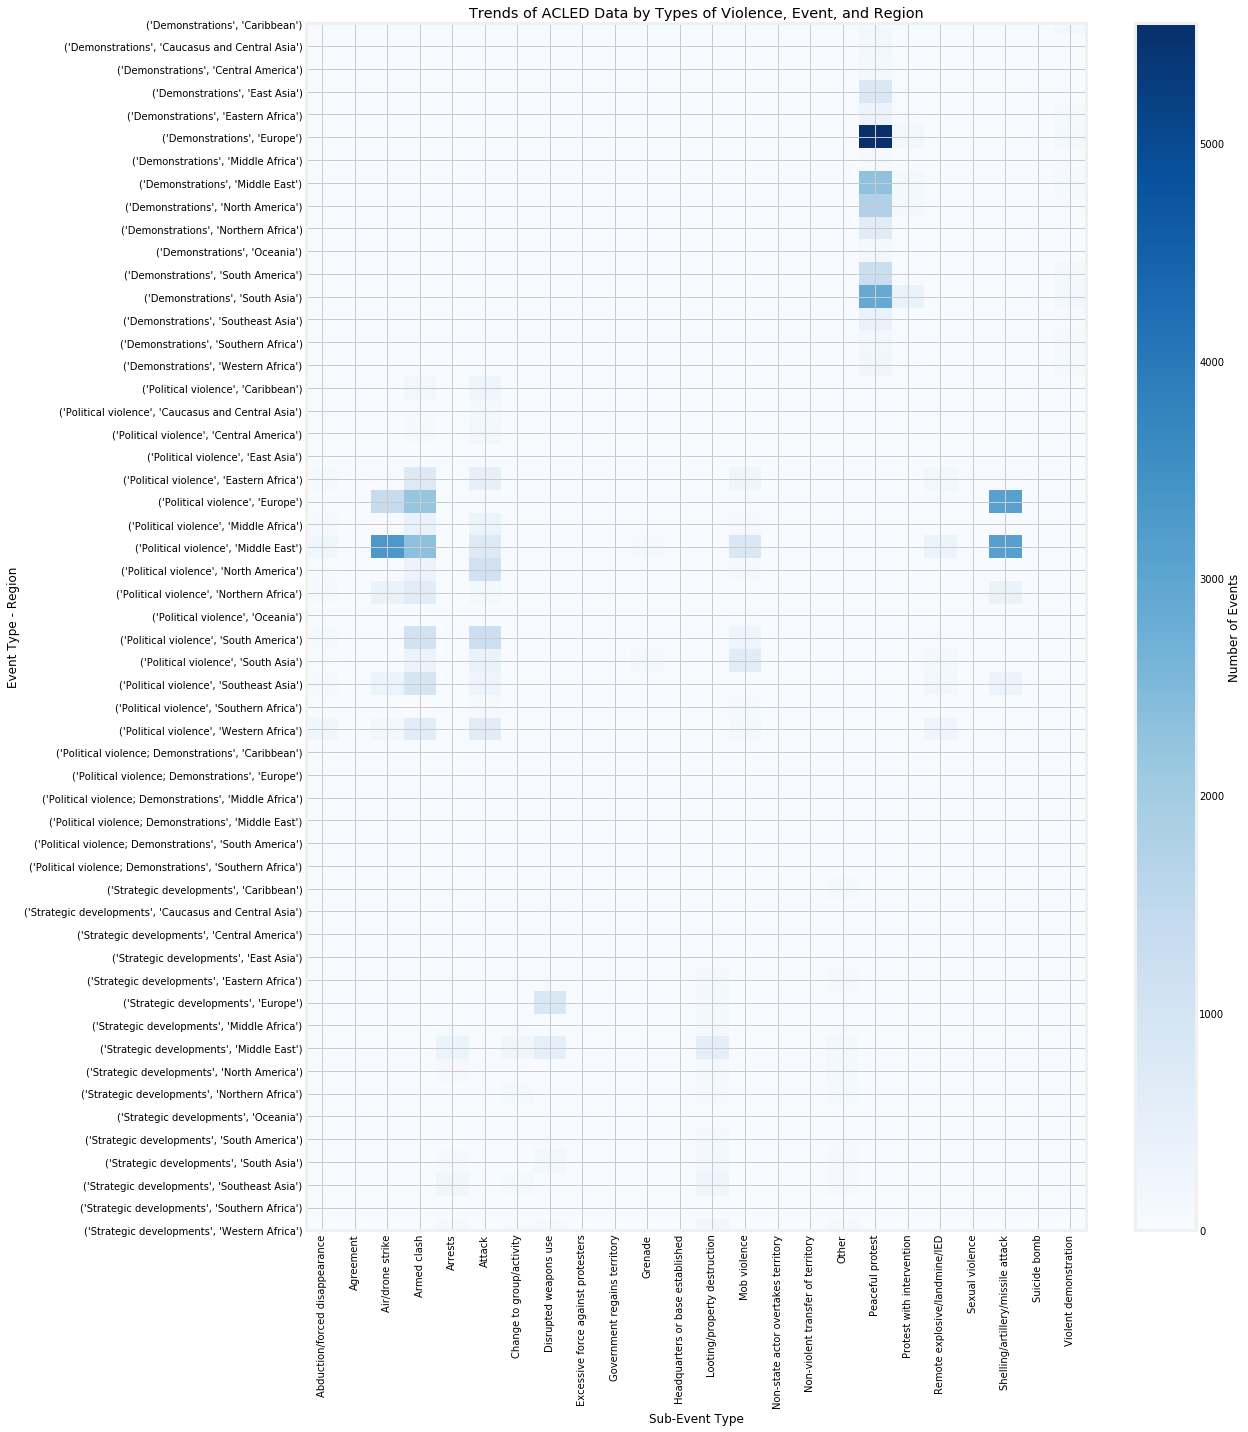

In [36]:
# Group the data by event type, region, and sub-event type and count occurrences
violence_trends_region = acled_file.groupby(['disorder_type', 'region', 'sub_event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(18, 20))
plt.imshow(violence_trends_region, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence, Event, and Region')
plt.xlabel('Sub-Event Type')
plt.ylabel('Event Type - Region')
plt.xticks(range(len(violence_trends_region.columns)), violence_trends_region.columns, rotation=90)
plt.yticks(range(len(violence_trends_region.index)), violence_trends_region.index)
plt.tight_layout()
plt.show()

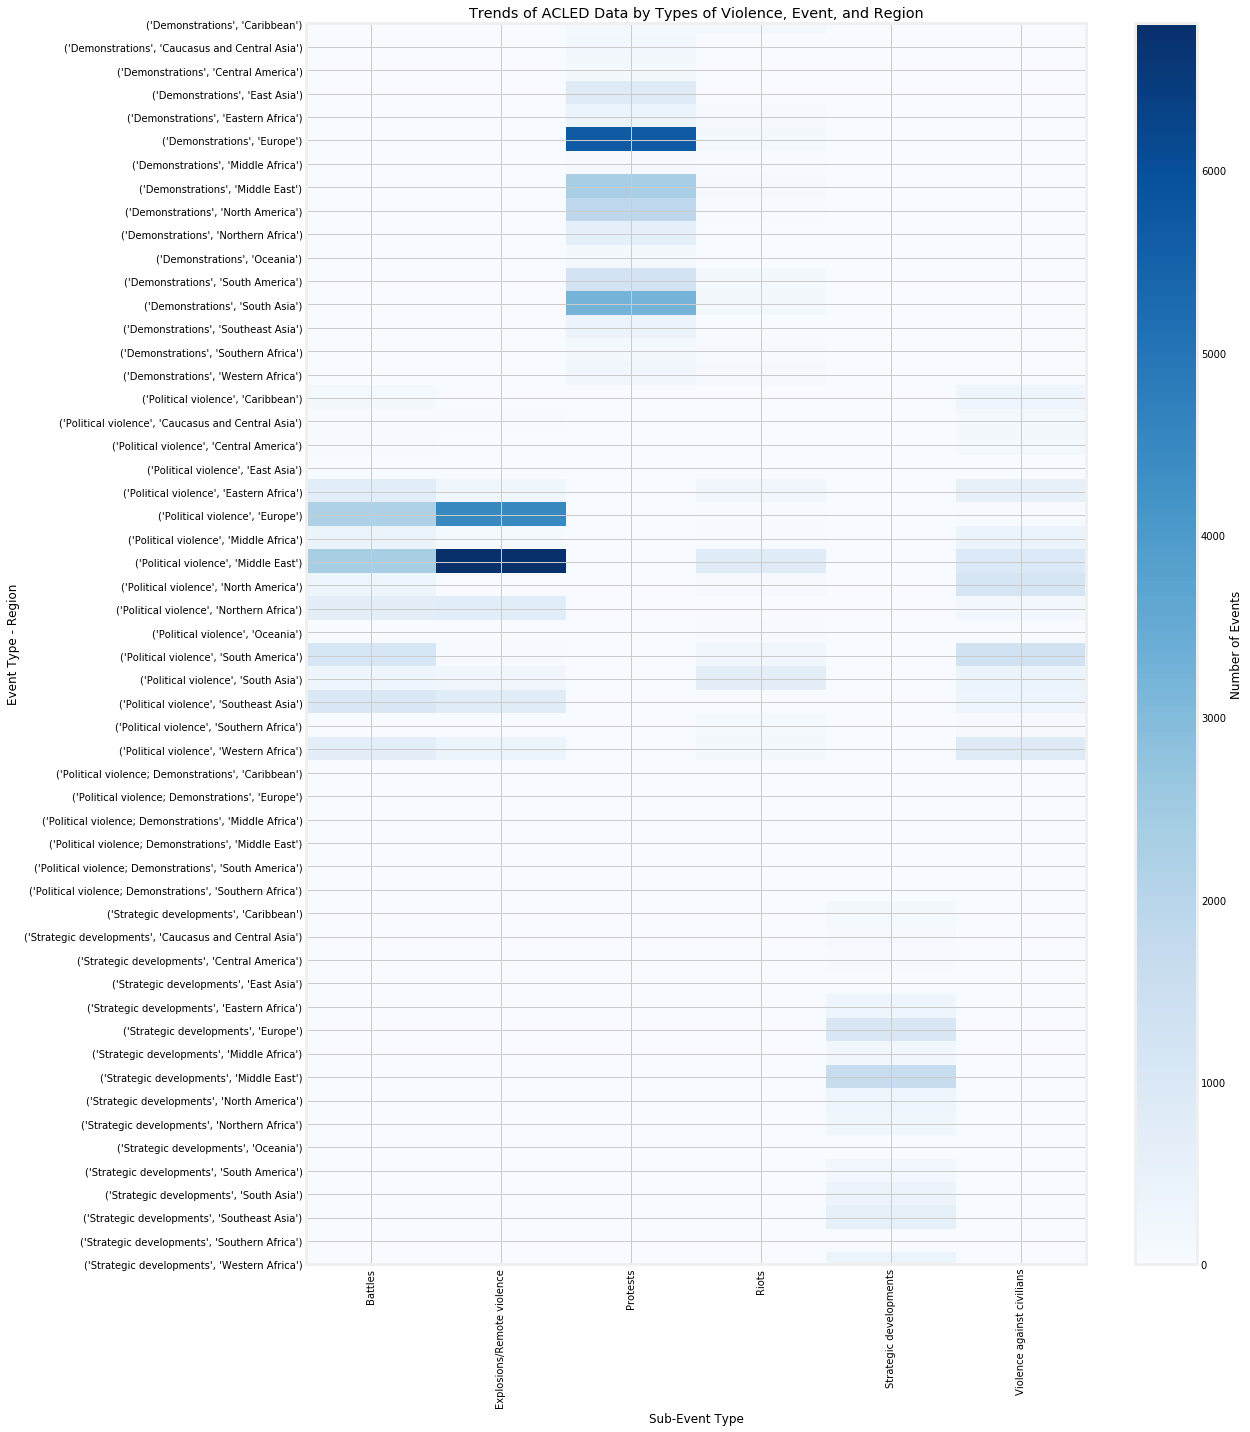

In [37]:
# Group the data by event type, region, and Event type and count occurrences
violence_trends_region_event = acled_file.groupby(['disorder_type', 'region', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(18, 20))
plt.imshow(violence_trends_region_event, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence, Event, and Region')
plt.xlabel('Sub-Event Type')
plt.ylabel('Event Type - Region')
plt.xticks(range(len(violence_trends_region_event.columns)), violence_trends_region_event.columns, rotation=90)
plt.yticks(range(len(violence_trends_region_event.index)), violence_trends_region_event.index)
plt.tight_layout()
plt.show()

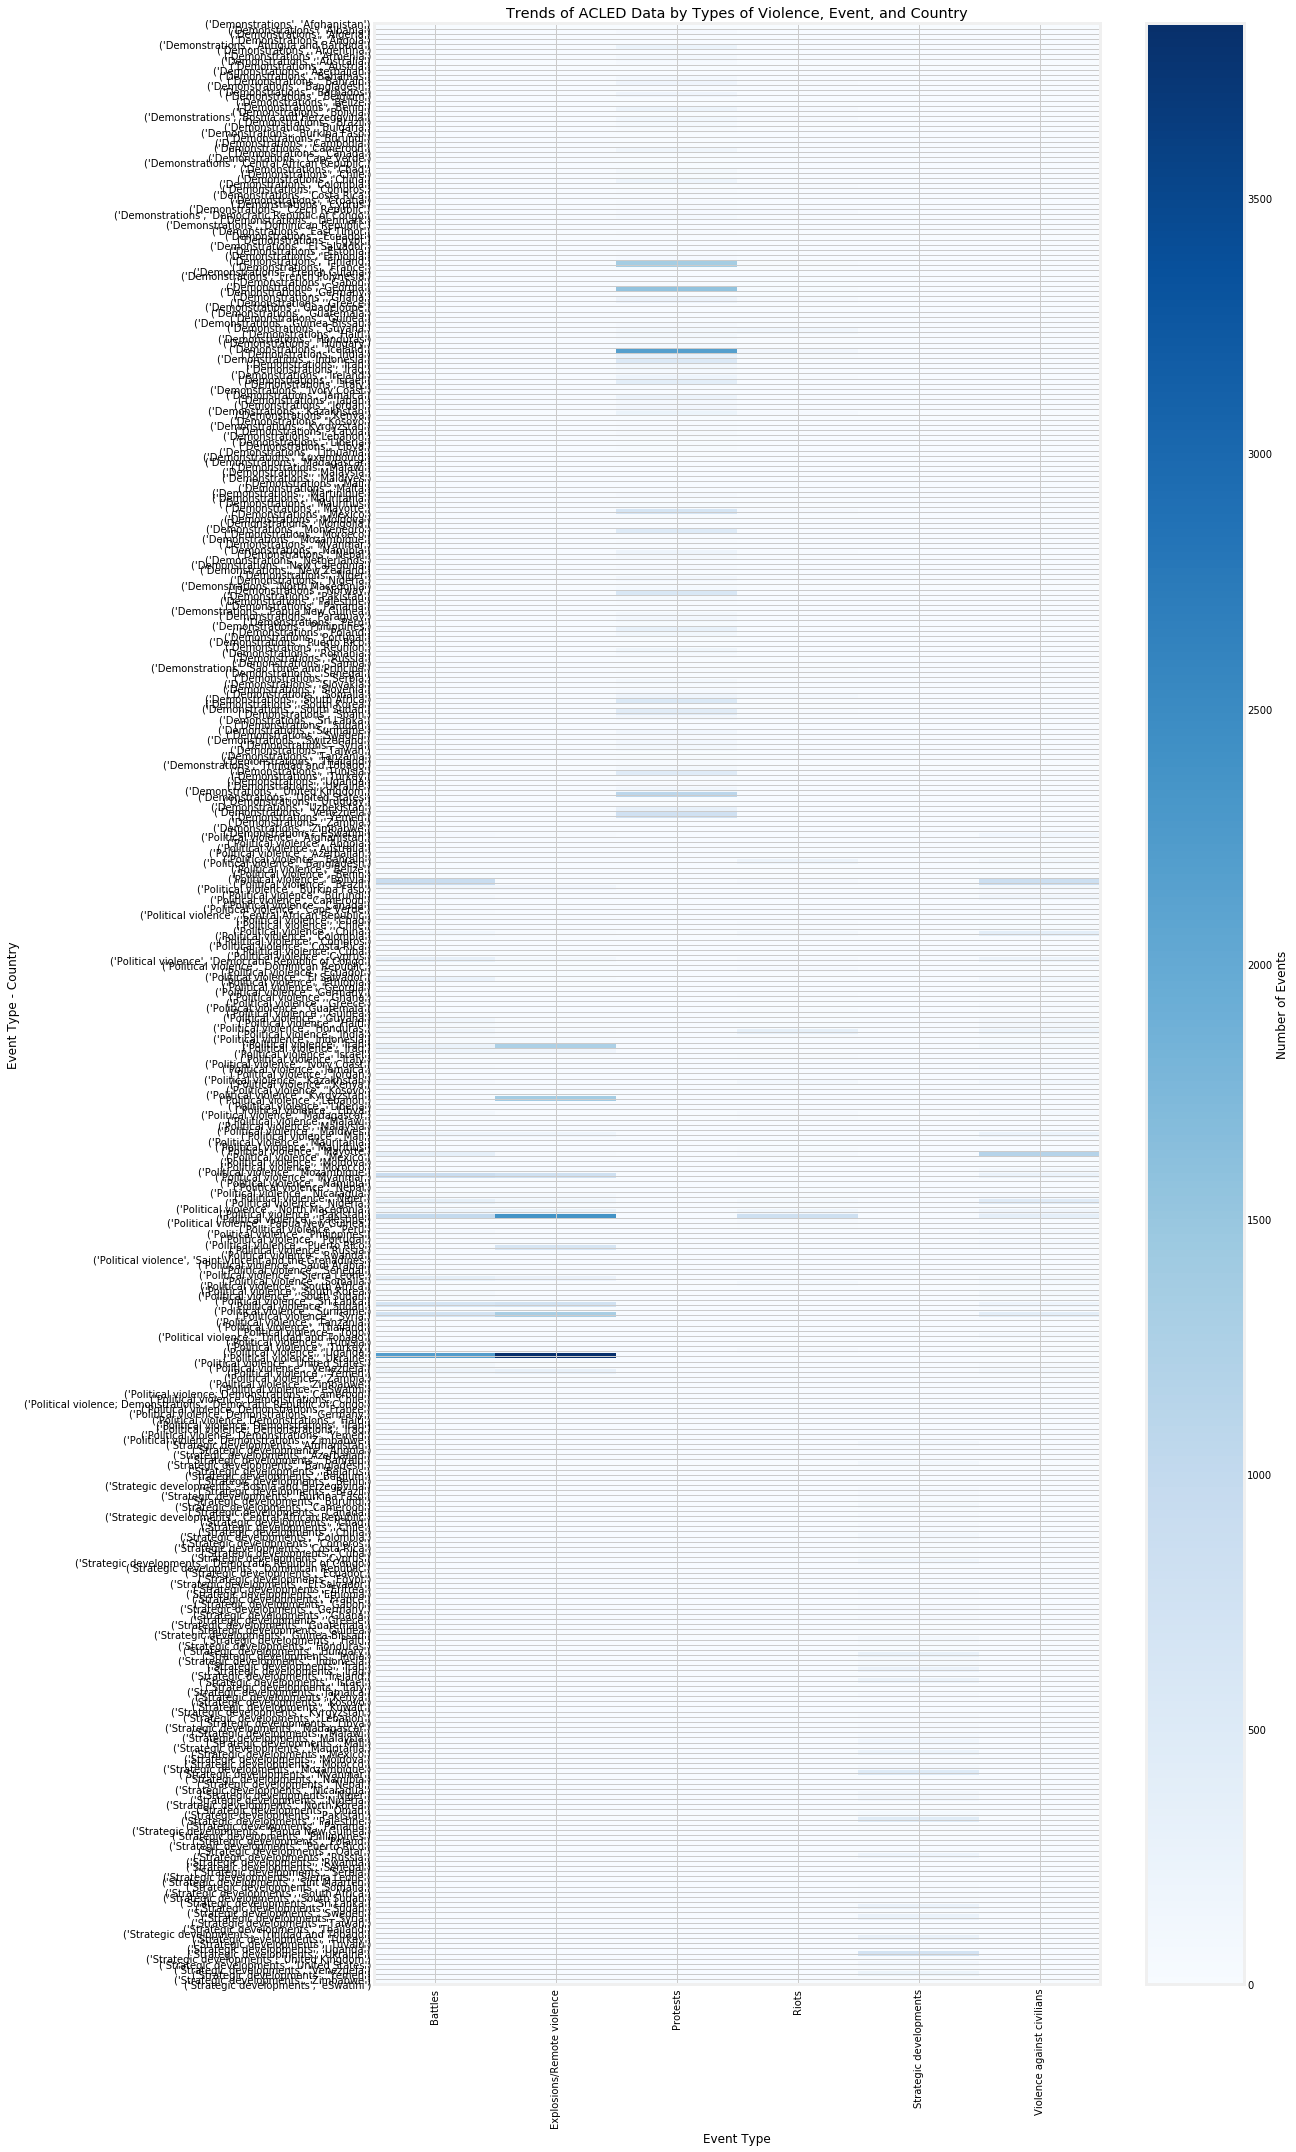

In [40]:
# Group the data by event type, region, and Event type and count occurrences
violence_trends_country_event = acled_file.groupby(['disorder_type', 'country', 'event_type']).size().unstack(fill_value=0)

# Visualize the trends using a heatmap
plt.figure(figsize=(18, 30))
plt.imshow(violence_trends_country_event, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Trends of ACLED Data by Types of Violence, Event, and Country')
plt.xlabel('Event Type')
plt.ylabel('Event Type - Country')
plt.xticks(range(len(violence_trends_country_event.columns)), violence_trends_country_event.columns, rotation=90)
plt.yticks(range(len(violence_trends_country_event.index)), violence_trends_country_event.index)
plt.tight_layout()
plt.show()

## Heatmap
**Violent Trends Per Country| **

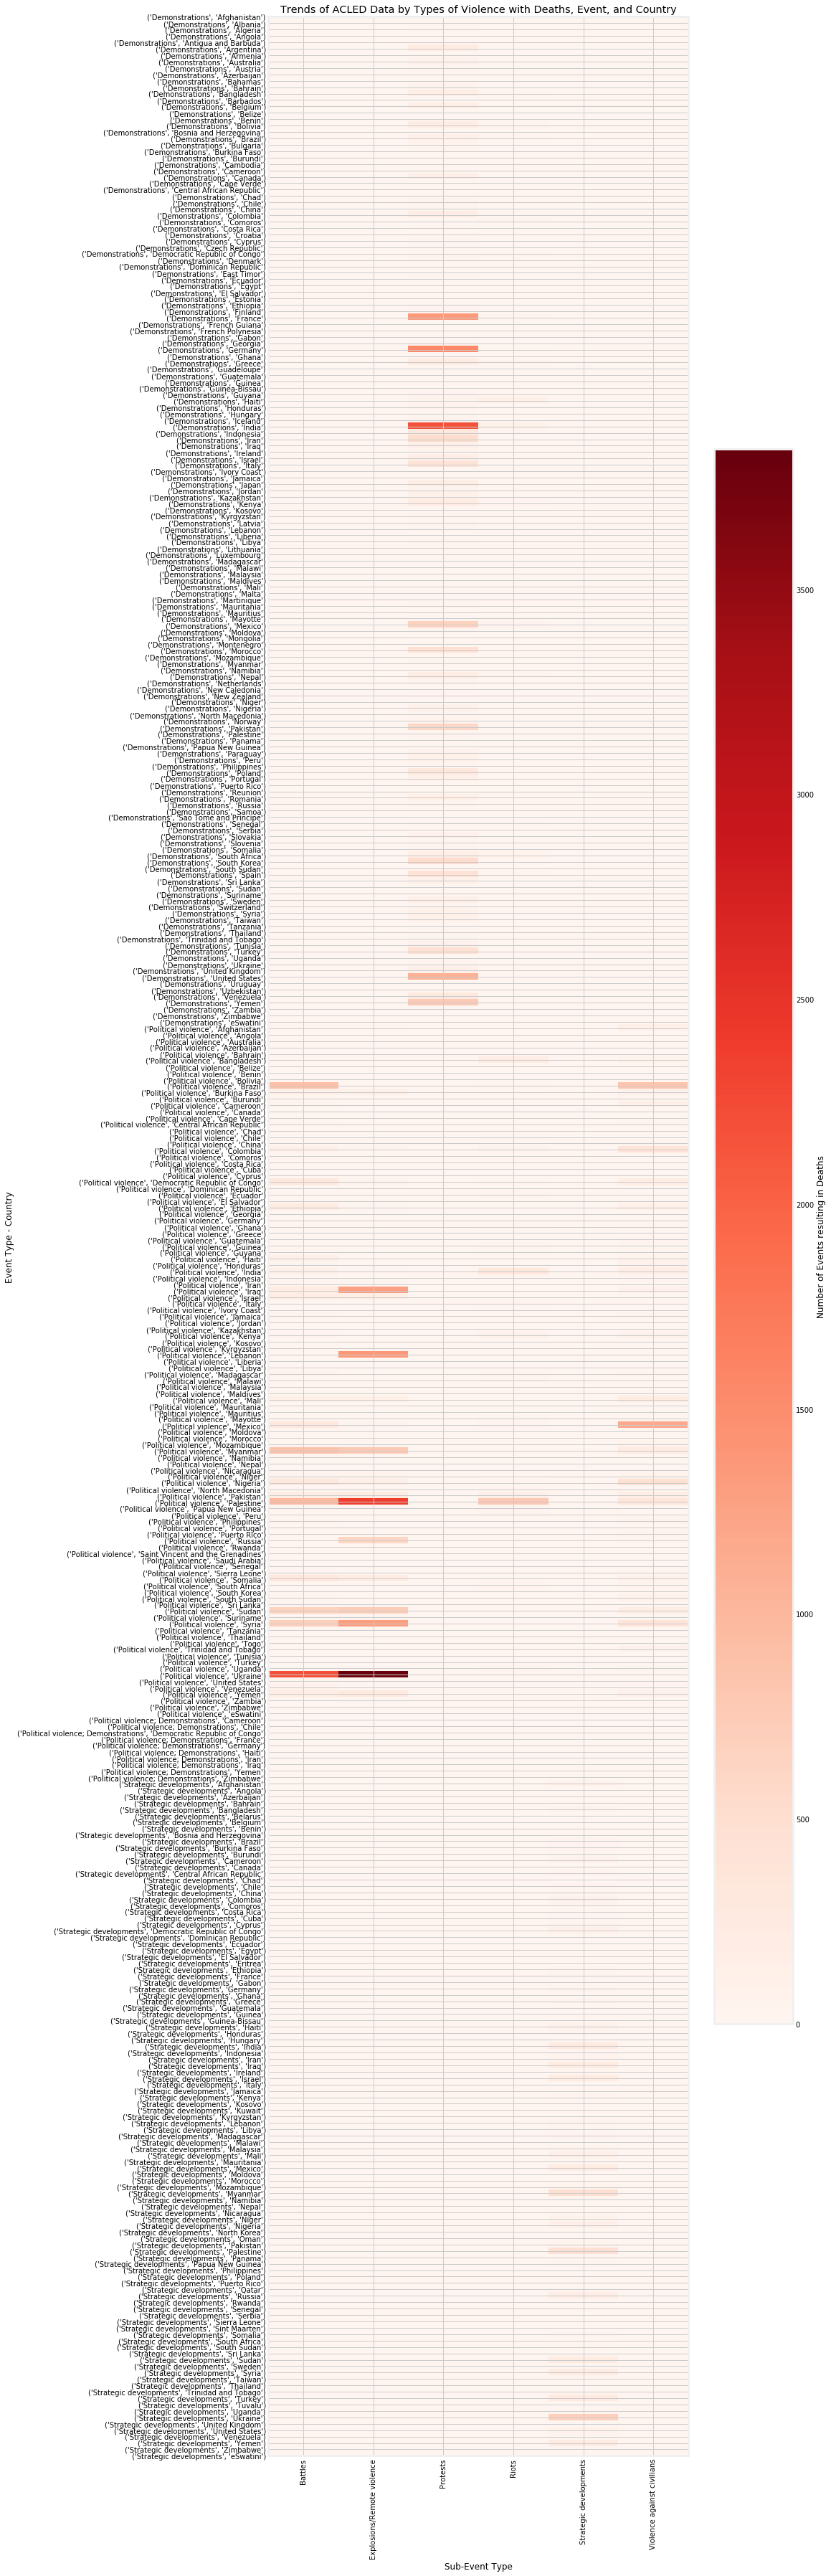

In [45]:
# Visualize the trends using a heatmap with violence_trends_country_event
plt.figure(figsize=(16, 50))
plt.imshow(violence_trends_country_event, cmap='Reds', aspect='auto')
plt.colorbar(label='Number of Events resulting in Deaths')
plt.title('Trends of ACLED Data by Types of Violence with Deaths, Event, and Country')
plt.xlabel('Sub-Event Type')
plt.ylabel('Event Type - Country')
plt.xticks(range(len(violence_trends_country_event.columns)), violence_trends_country_event.columns, rotation=90)
plt.yticks(range(len(violence_trends_country_event.index)), violence_trends_country_event.index)
plt.tight_layout()
plt.show()

## Word Cloud

In [98]:
?WordCloud

In [ ]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

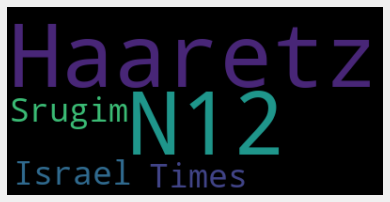

In [99]:
# Start with one source:
text = acled_file.source[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

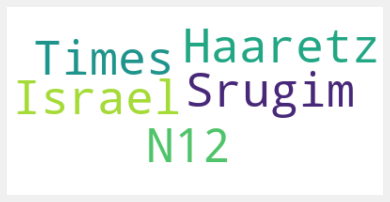

In [100]:
#Adjust to white background and making most counted source smaller in size 
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

### So now you'll combine all source into one big text and create a big fat cloud to see which sources are most common in these wines.
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

In [101]:
#Create a list of all the text in source column
text_in_source_column = " ".join(review for review in acled_file.source)
print ("There are {} words in the combination of all sources.".format(len(text_in_source_column)))

There are 1483609 words in the combination of all sources.


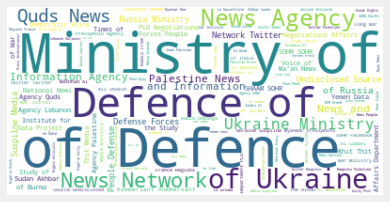

In [108]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
stopwords = nltk.corpus.stopwords.words('english') # Need to include for English dictionary 
                                                    #B/c error thrown: https://stackoverflow.com/questions/39536767/lazycorpusloader-object-is-not-iterable

# Generate a word cloud image from text_in_source_column
wordcloud_source = WordCloud(stopwords=stopwords, background_color="white").generate(text_in_source_column) #include all sources

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_source, interpolation='bilinear')
plt.axis("off")
plt.show()

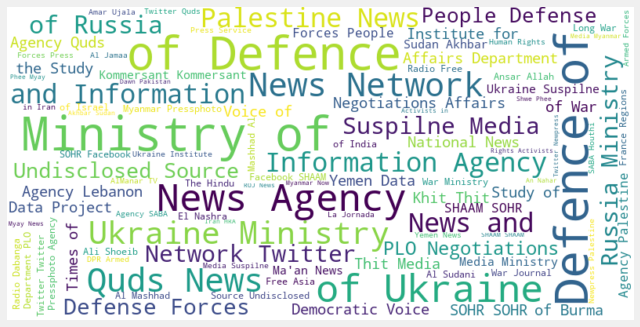

In [127]:
# Use text_in_source_column
#increase max_font_size, change the maximum number of word and lighten the background:
wordcloud_source_bigger = WordCloud(max_font_size=60, max_words=100, width=800, height=400,background_color="white").generate(text_in_source_column)
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.imshow(wordcloud_source_bigger, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word Cloud Exercise on 'notes' column

In [123]:
#check stopwords
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [115]:
#Create a list of all the text in 'notes' column
text_in_notes_column = " ".join(review for review in acled_file.notes)
print ("There are {} words in the combination of all notes.".format(len(text_in_notes_column)))

There are 15185199 words in the combination of all notes.


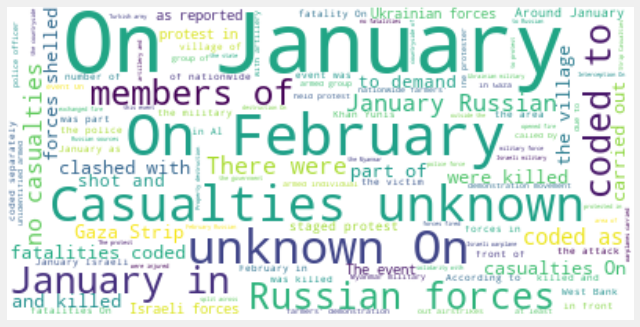

In [128]:
#update stopwords
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopwords = set(STOPWORDS)
#stopwords.update(["in", 'as','to','On','and'])

# Generate a word cloud image from text_in_notes_column
wordcloud_notes = WordCloud(stopwords=stopwords, background_color="white").generate(text_in_notes_column) #include all sources

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.imshow(wordcloud_notes, interpolation='bilinear')
plt.axis("off")
plt.show()